<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [13]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


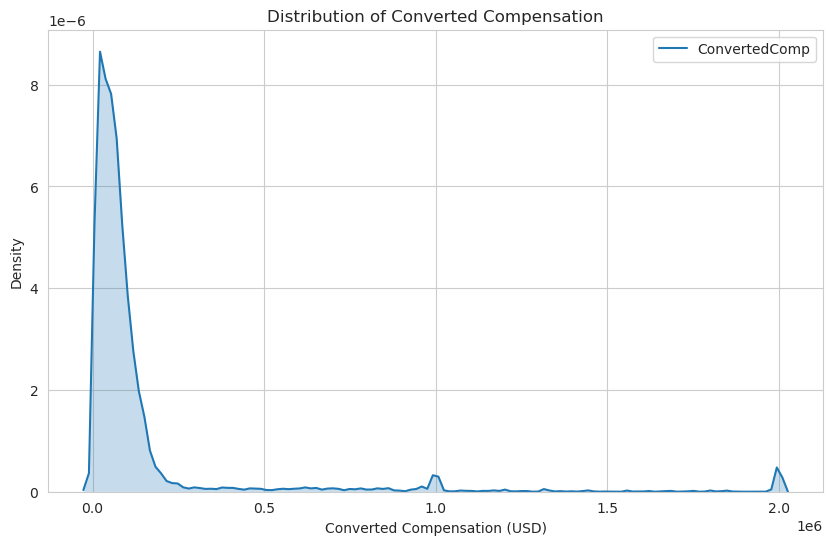

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'], shade=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


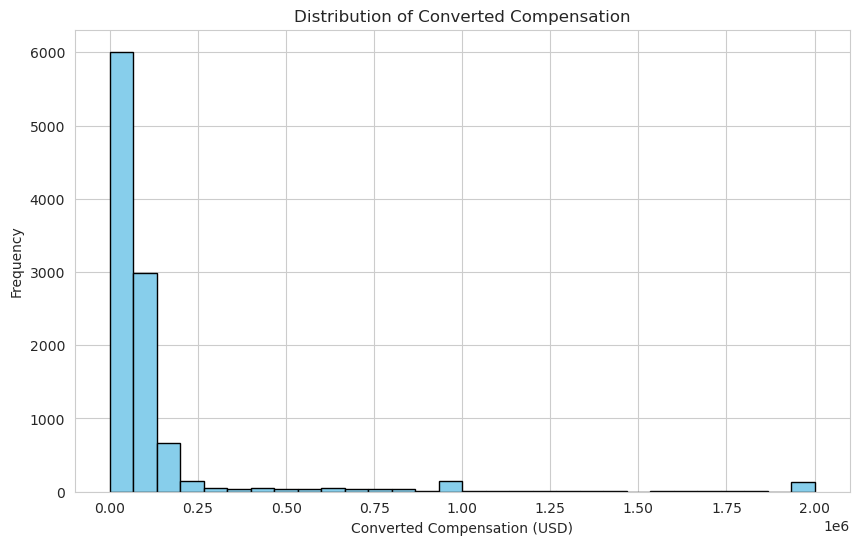

In [5]:
# your code goes here
import matplotlib.pyplot as plt

# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()

print("Median ConvertedComp:", median_converted_comp)

Median ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
# Count the number of responders who identified themselves only as "Man"
man_only_count = df[df['Gender'] == 'Man'].shape[0]

print("Number of responders who identified themselves only as 'Man':", man_only_count)


Number of responders who identified themselves only as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
# Filter the DataFrame for responders identified only as "Woman"
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for this subset
median_converted_comp_woman = woman_df['ConvertedComp'].median()

print("Median ConvertedComp of responders identified themselves only as 'Woman':", median_converted_comp_woman)


Median ConvertedComp of responders identified themselves only as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


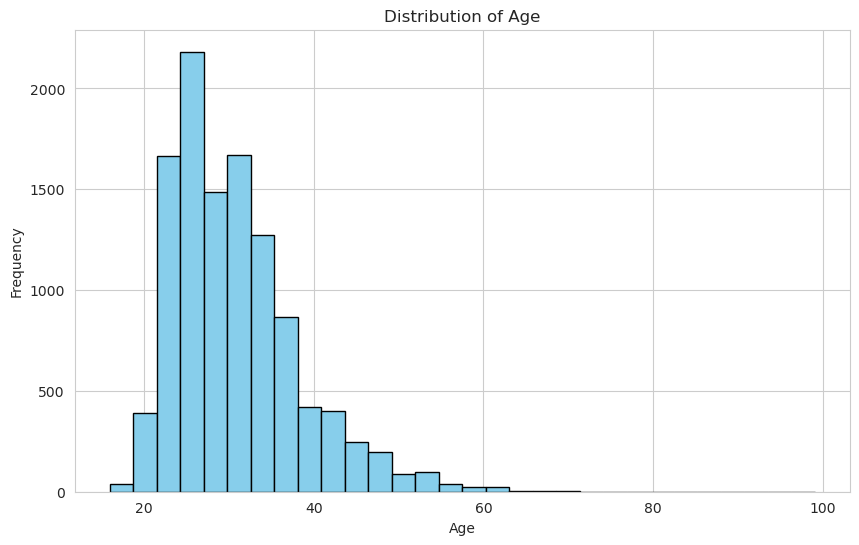

In [11]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


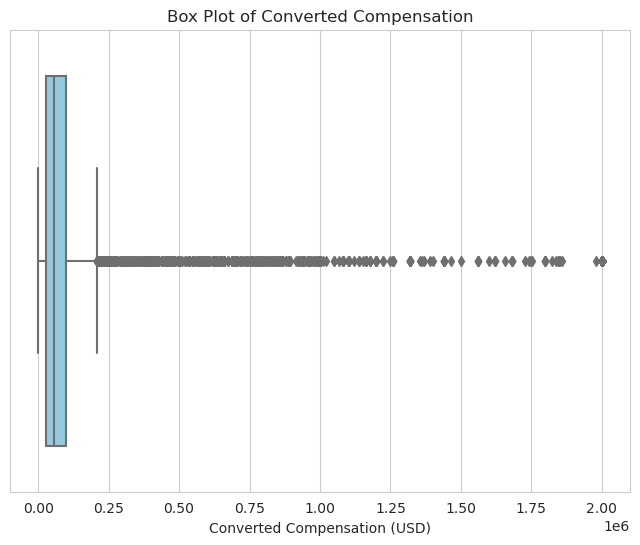

In [12]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedComp'], color='skyblue')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for the column 'ConvertedComp':", IQR)


Interquartile Range (IQR) for the column 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [15]:
# your code goes here

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for outliers:", lower_bound)
print("Upper Bound for outliers:", upper_bound)


Lower Bound for outliers: -82830.0
Upper Bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:


# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in the 'ConvertedComp' column:", num_outliers)


Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here


# Create a new DataFrame by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame
print("Shape of the new DataFrame after removing outliers:", df_no_outliers.shape)


Shape of the new DataFrame after removing outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
pd.set_option('display.max_columns', None)

In [24]:
# your code goes here
# Find the correlation between 'Age' and all other numerical columns
age_correlation = df.corr()['Age']

print("Correlation between Age and all other numerical columns:")
print(age_correlation)


Correlation between Age and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
